In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
841,2020-07-01,United Kingdom,313261.0,312654.0,43677.0,43730.0,607.0,-53.0
842,2020-07-01,Germany,194612.0,194725.0,8987.0,8985.0,-113.0,2.0
843,2020-07-01,Iran,228236.0,227662.0,10801.0,10817.0,574.0,-16.0
844,2020-07-01,Turkey,199869.0,199906.0,5130.0,5131.0,-37.0,-1.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2593.3486997635932
RMSE =  6231.3313604430205


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  320.3002364066194
RMSE =  730.587125853828


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAPE =  13306.867469879518
RMSE =  16791.64522892191
-- World performances for deaths --
MAPE =  1616.879518072289
RMSE =  1961.4579314549344


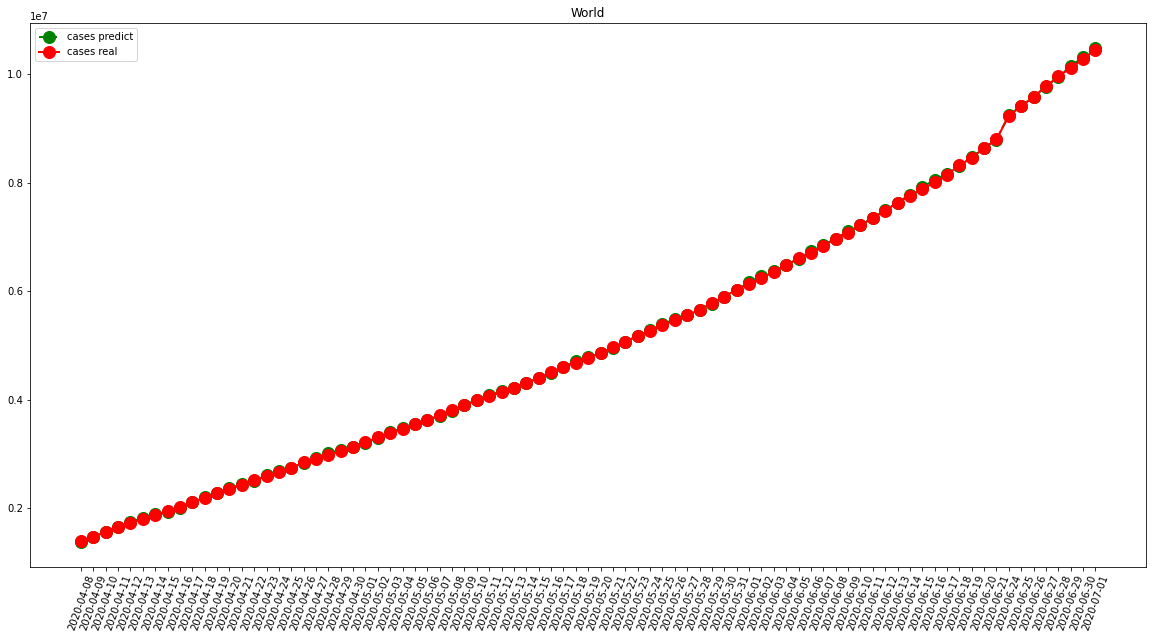

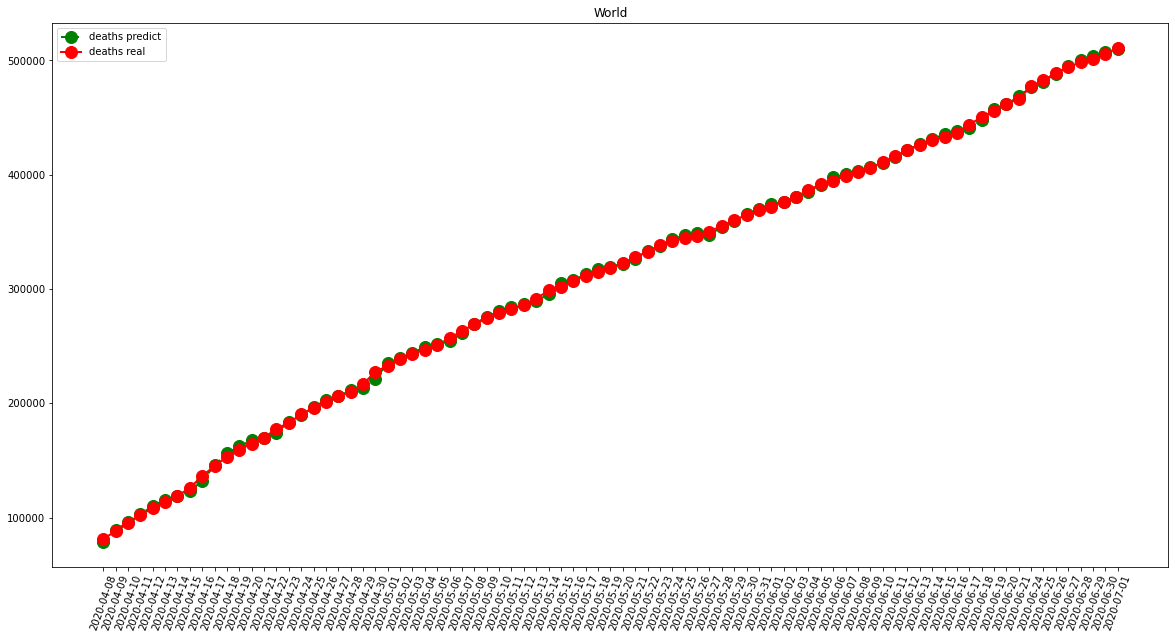

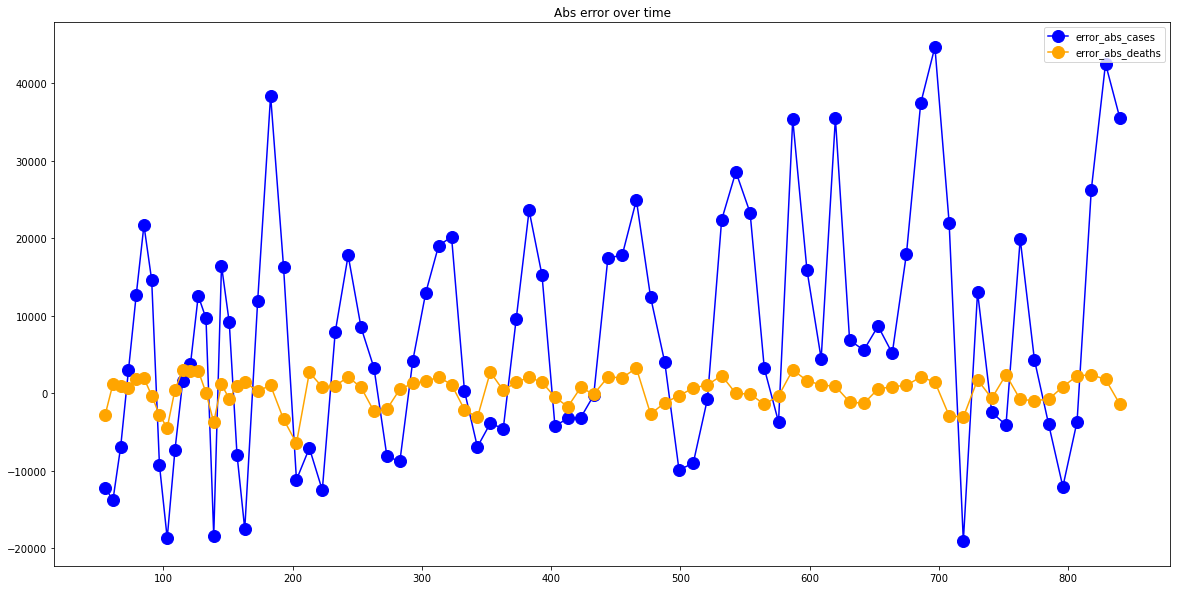

In [7]:
visShow("World")

-- France performances for cases --
MAPE =  905.6774193548387
RMSE =  1492.7506399657914
-- France performances for deaths --
MAPE =  188.78494623655914
RMSE =  347.3025237609895


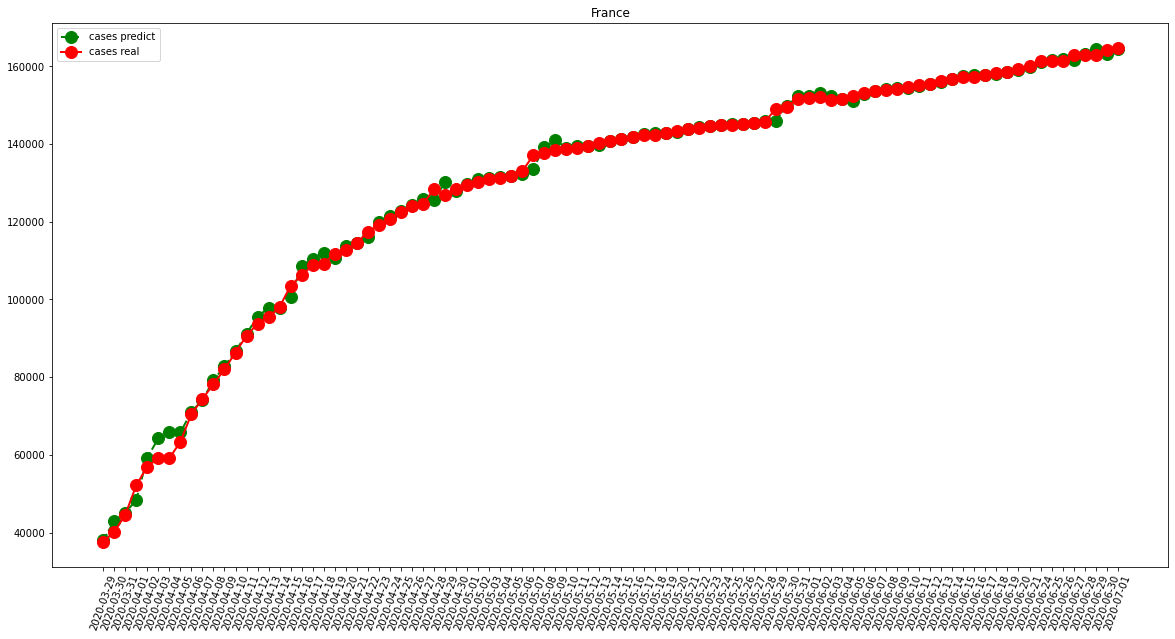

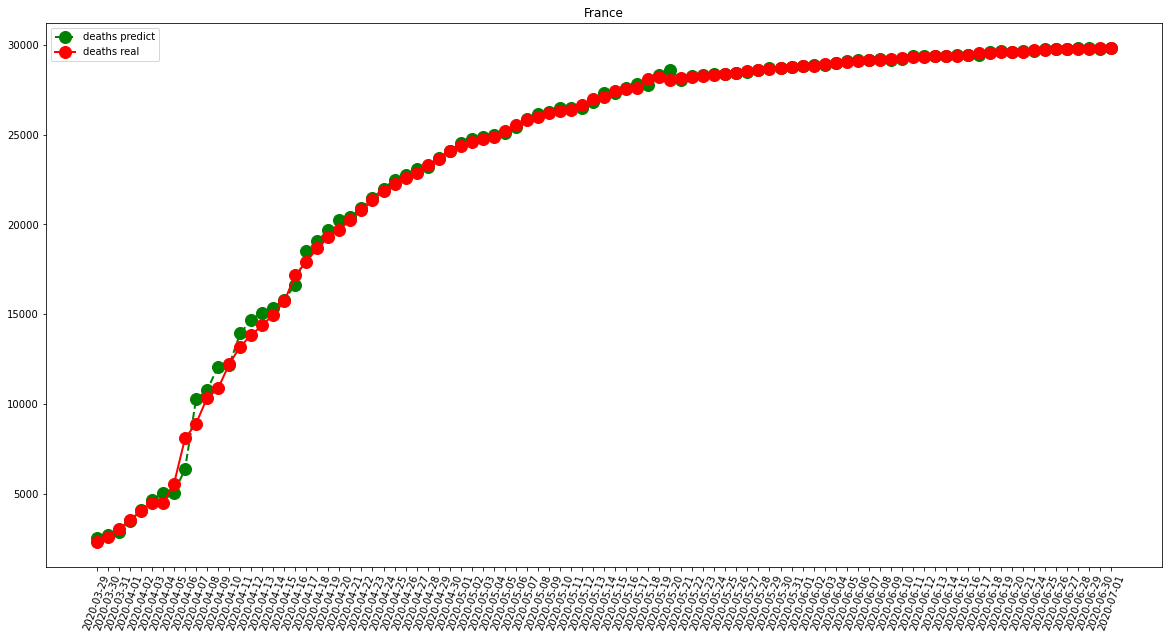

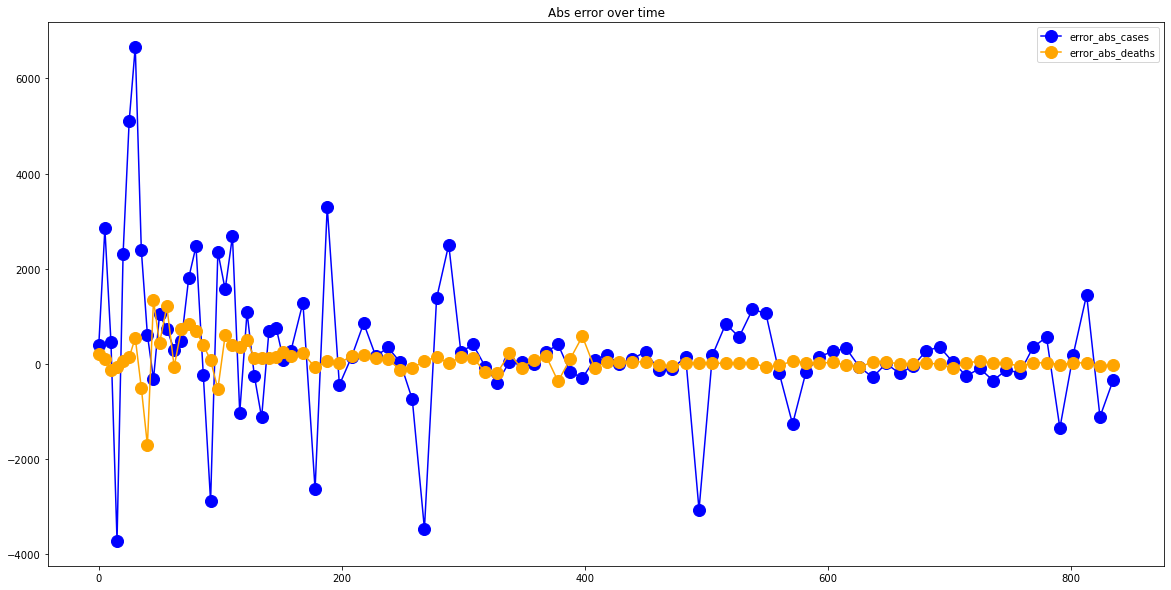

In [8]:
visShow("France")

-- Italy performances for cases --
MAPE =  391.03225806451616
RMSE =  561.4313887743322
-- Italy performances for deaths --
MAPE =  103.05376344086021
RMSE =  306.5751499724744


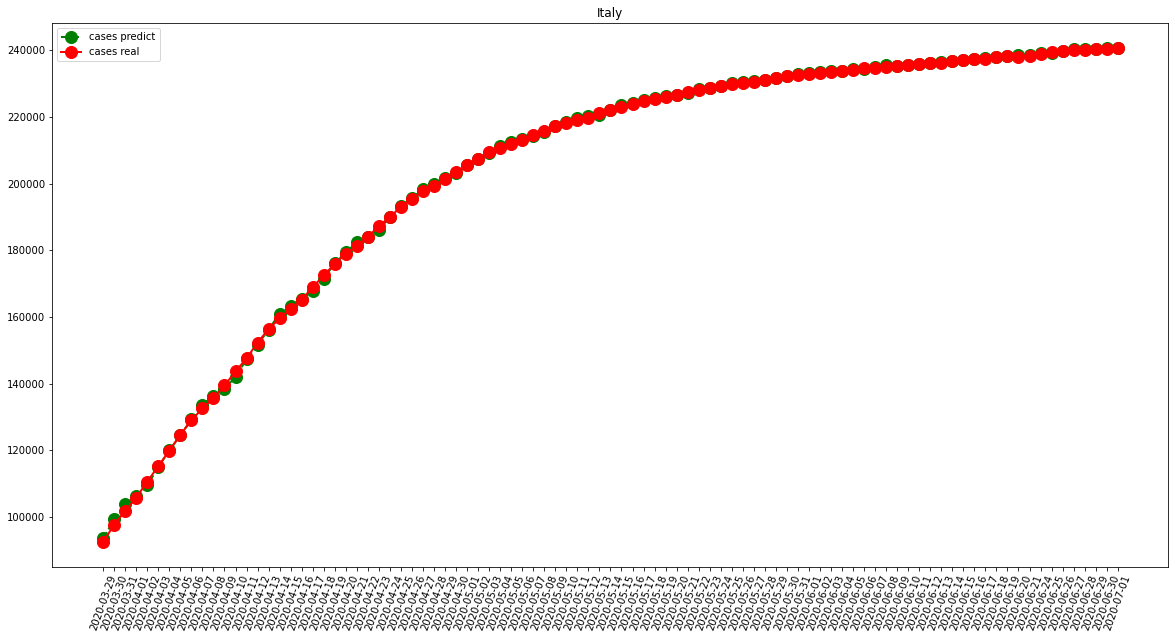

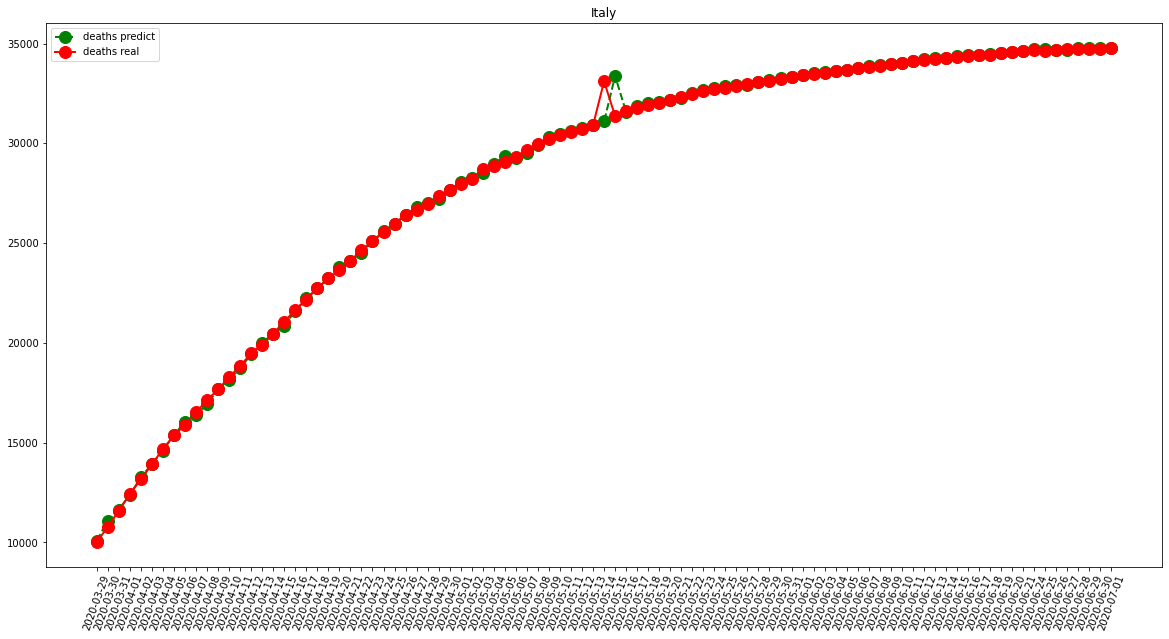

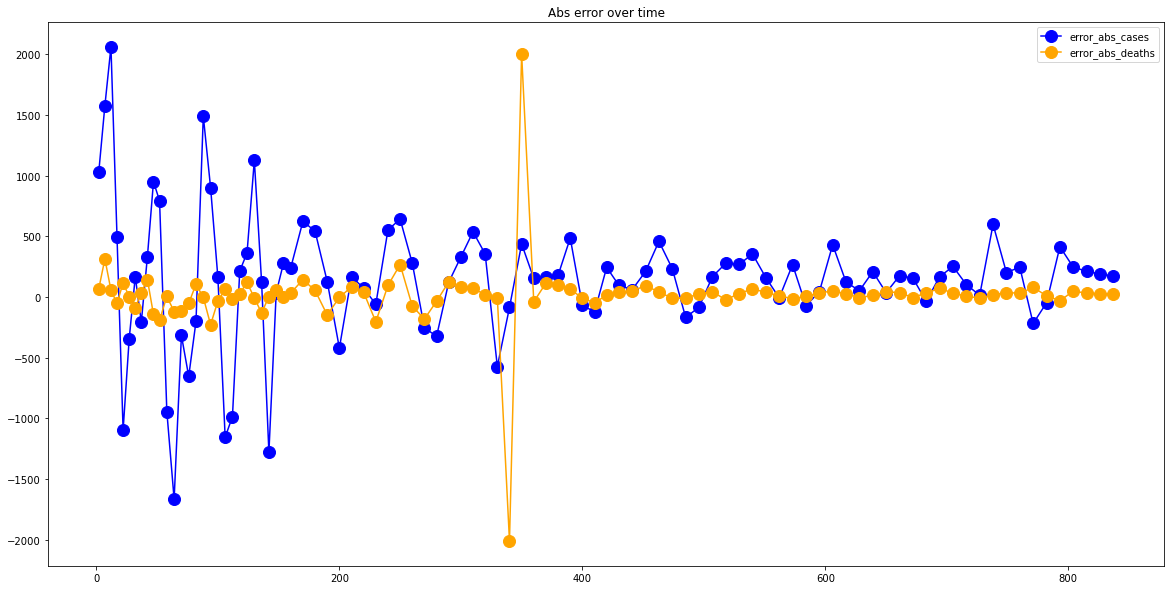

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAPE =  889.3225806451613
RMSE =  2119.3045242877834
-- Spain performances for deaths --
MAPE =  193.94623655913978
RMSE =  420.8576879996219


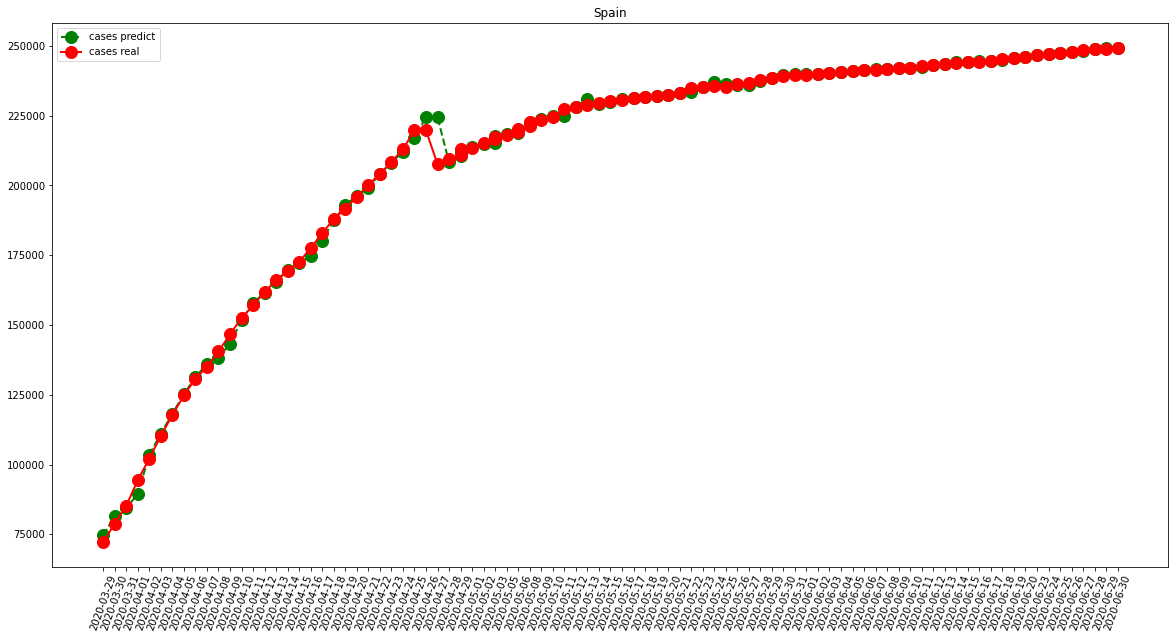

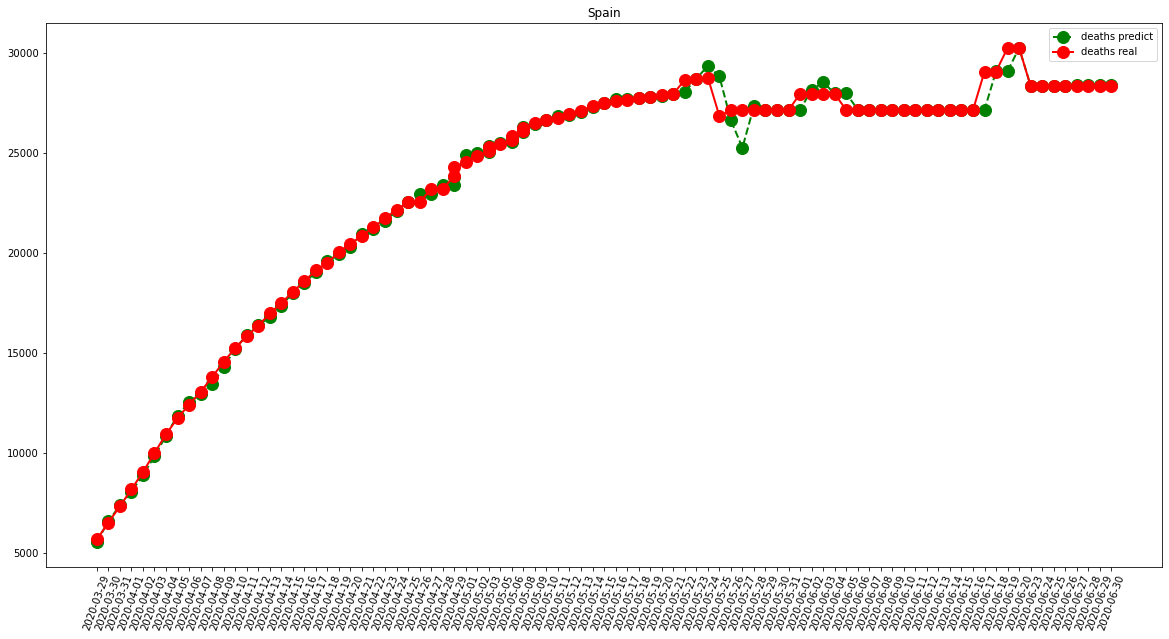

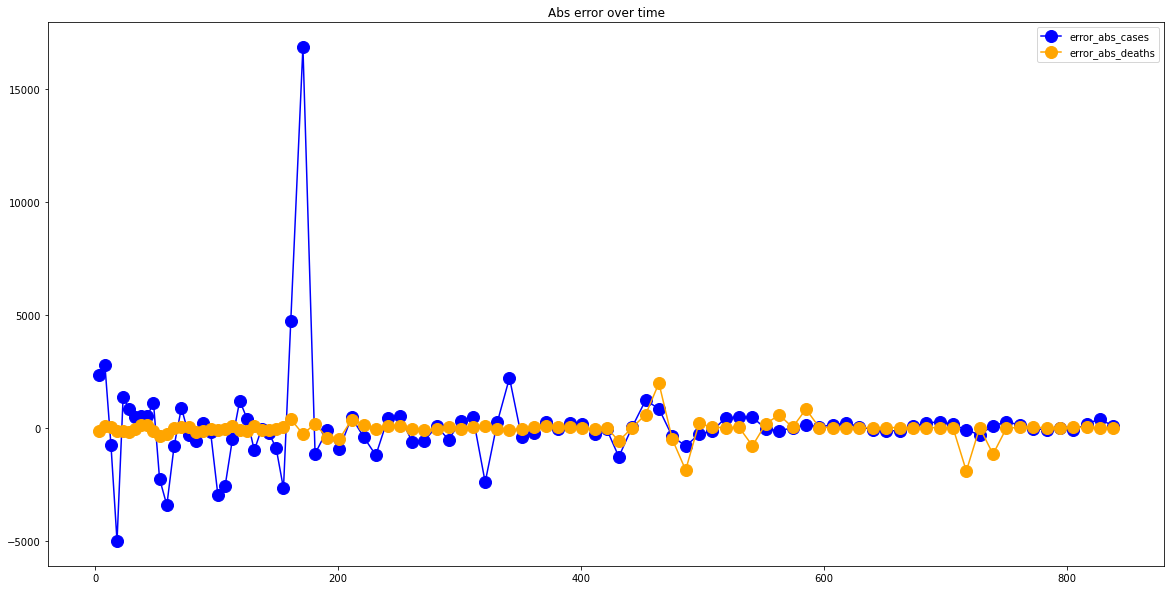

In [10]:
visShow("Spain")

-- United States performances for cases --
MAPE =  4678.967741935484
RMSE =  6457.54134776267
-- United States performances for deaths --
MAPE =  548.1290322580645
RMSE =  800.6648178467906


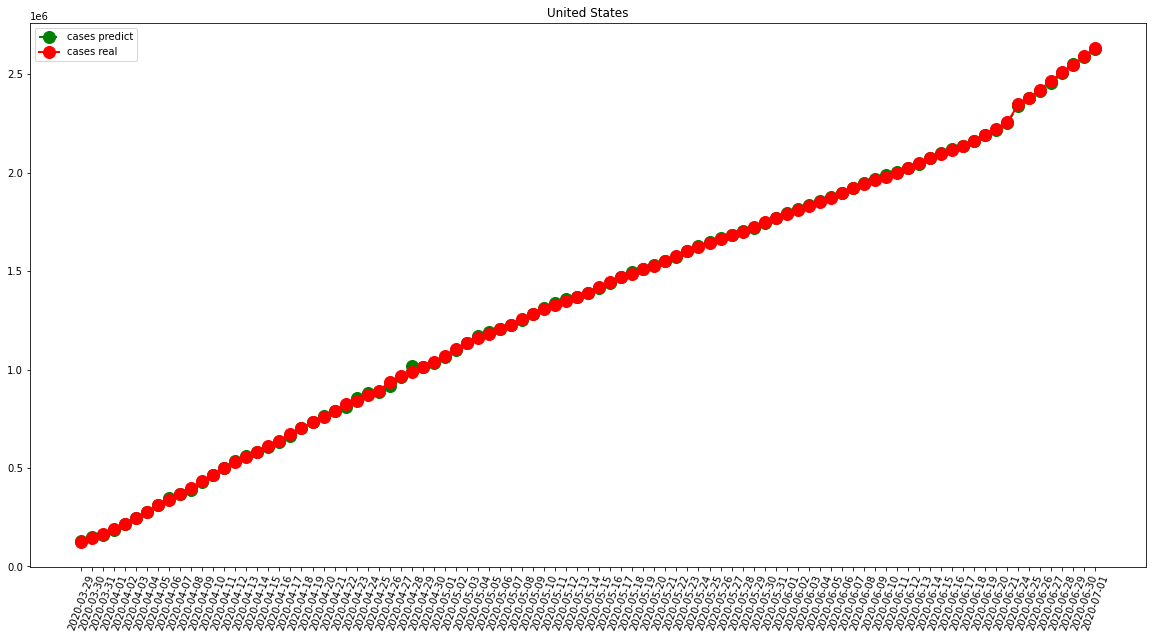

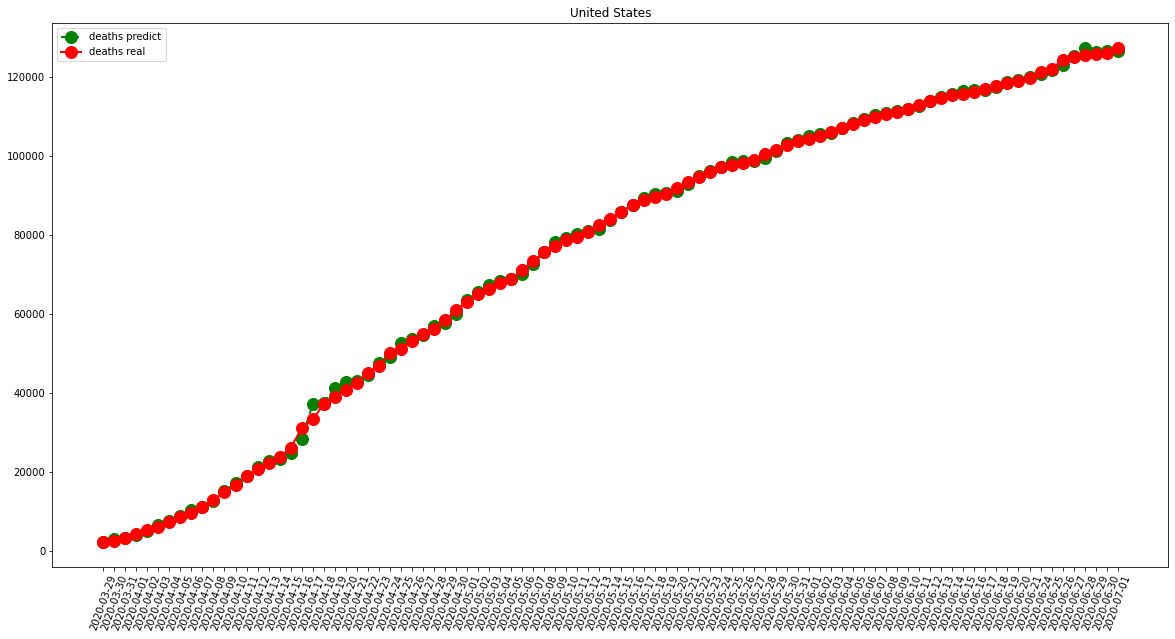

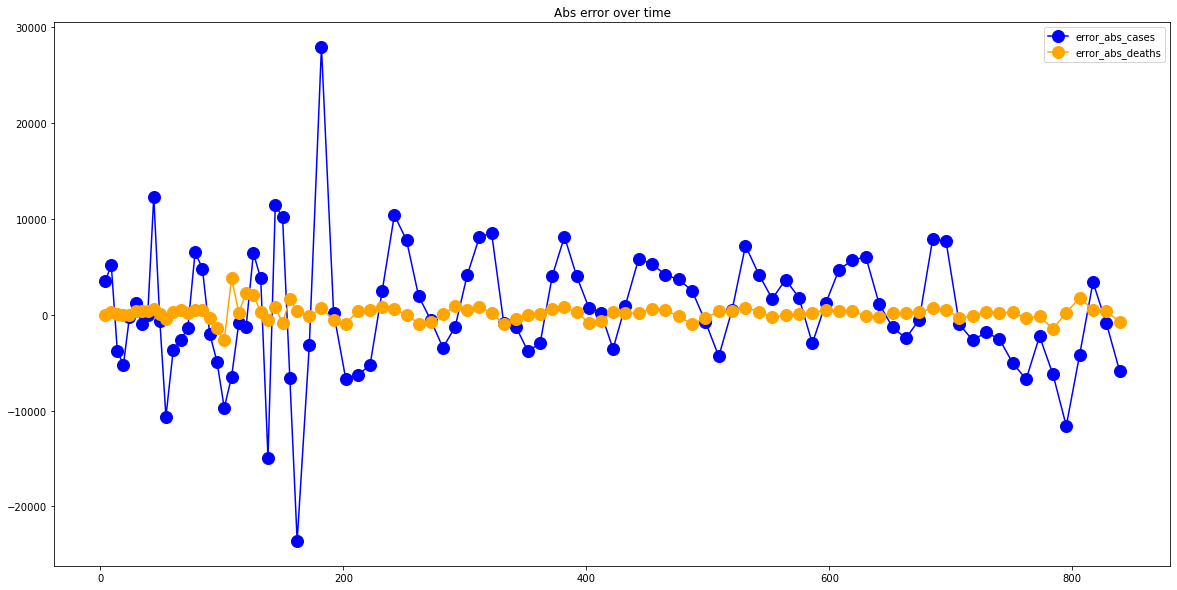

In [11]:
visShow("United States")

-- China performances for cases --
MAPE =  93.35483870967742
RMSE =  121.84539825232964
-- China performances for deaths --
MAPE =  40.58064516129032
RMSE =  162.72835072301402


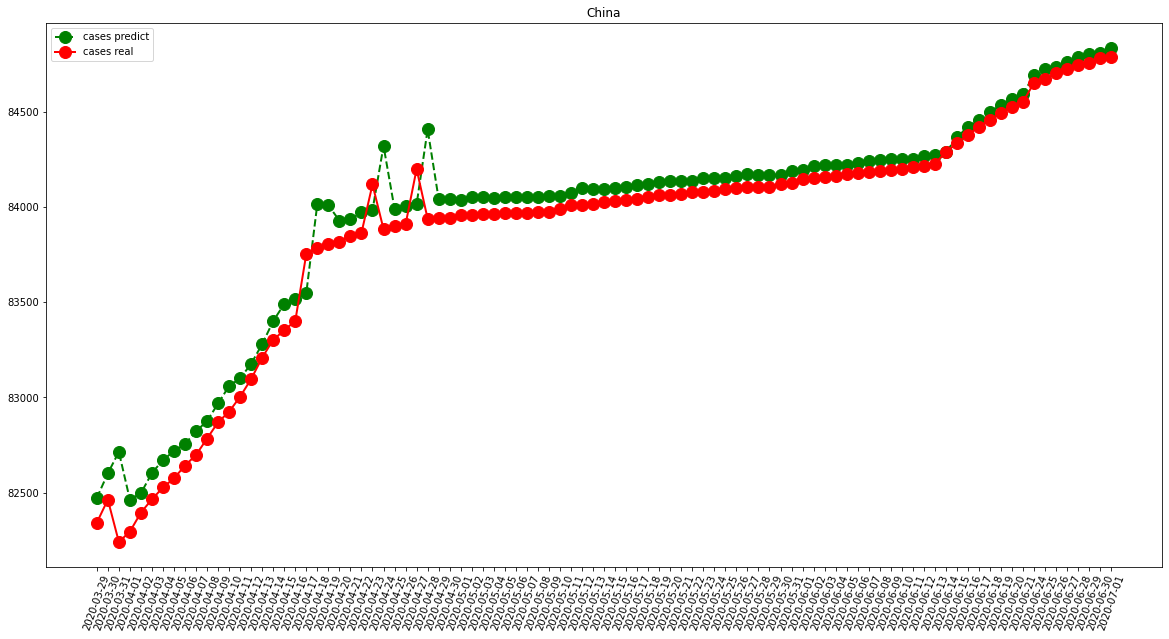

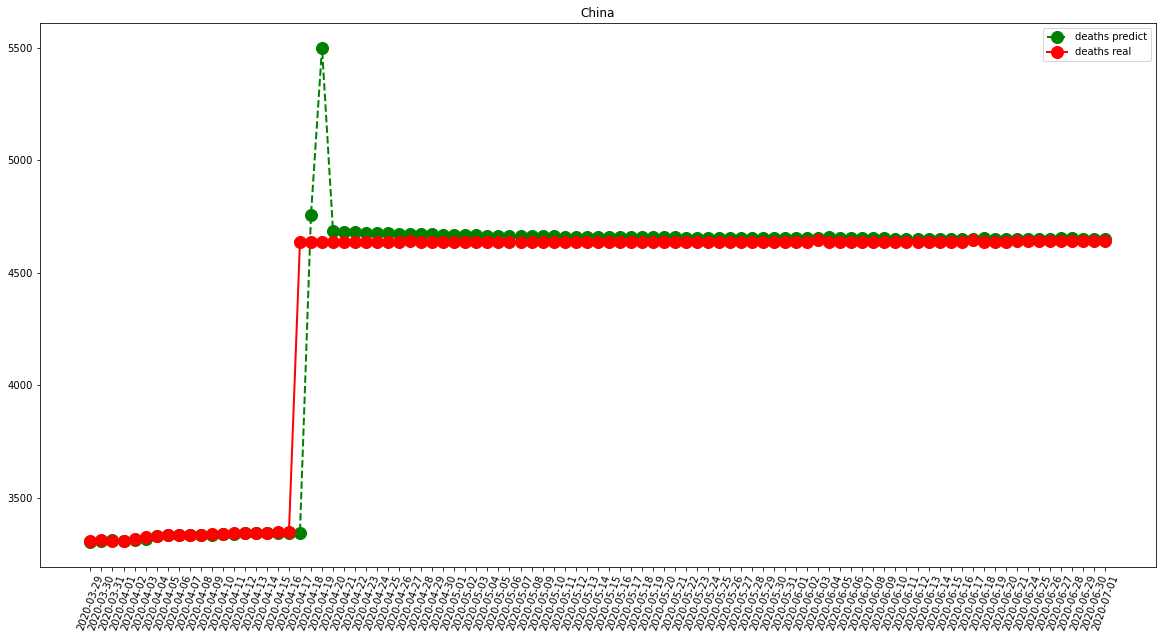

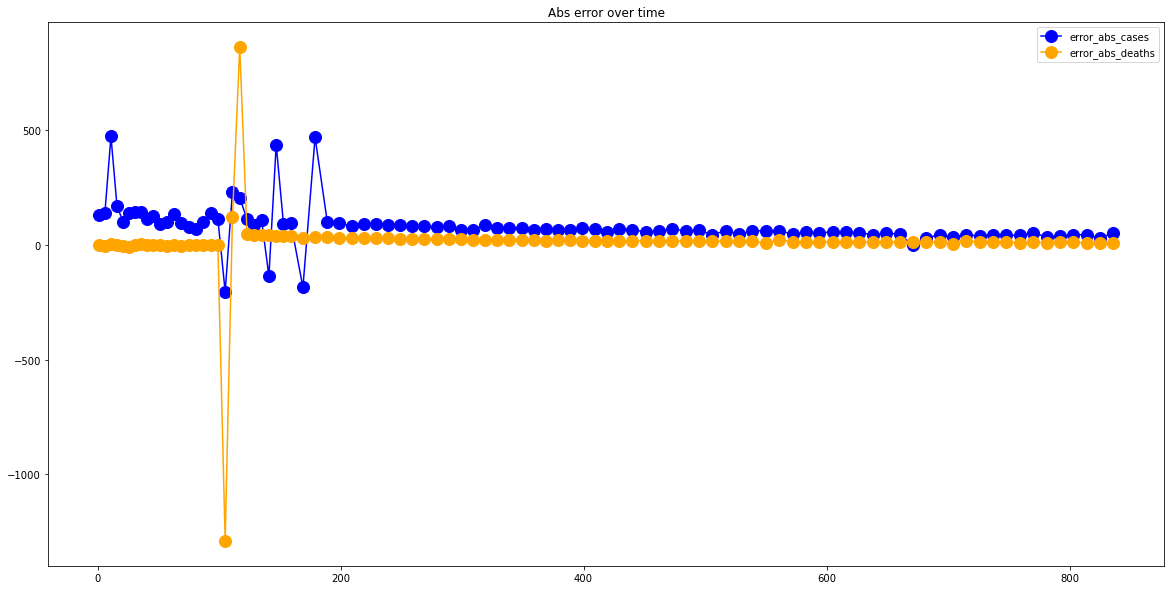

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAPE =  844.2
RMSE =  1170.8514653217776
-- United Kingdom performances for deaths --
MAPE =  259.5076923076923
RMSE =  605.7263916476329


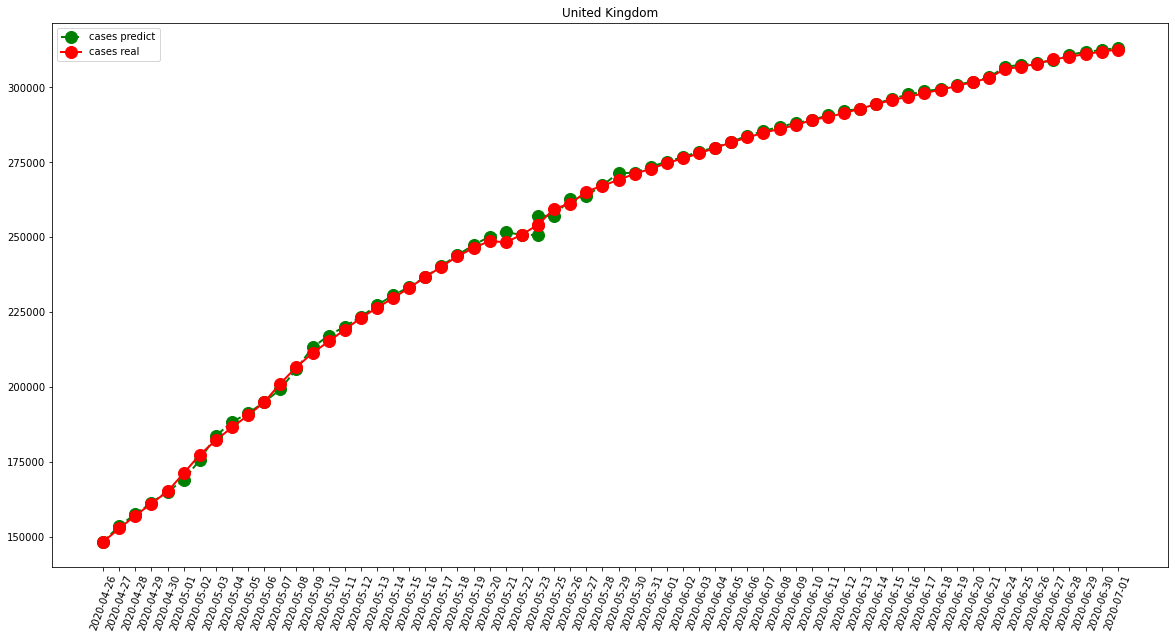

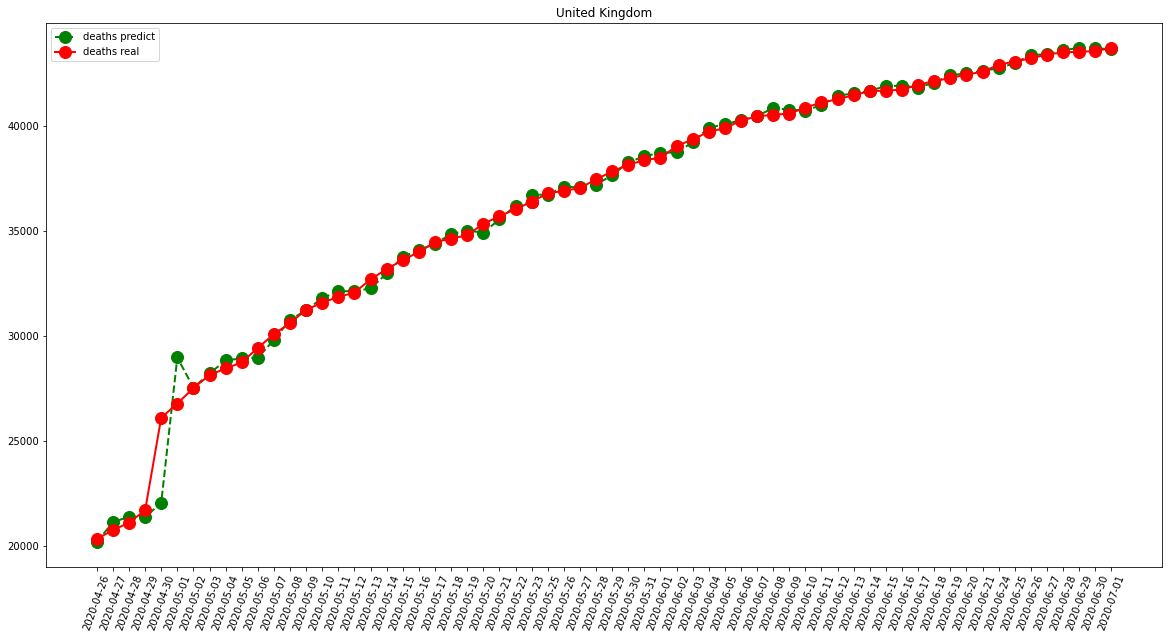

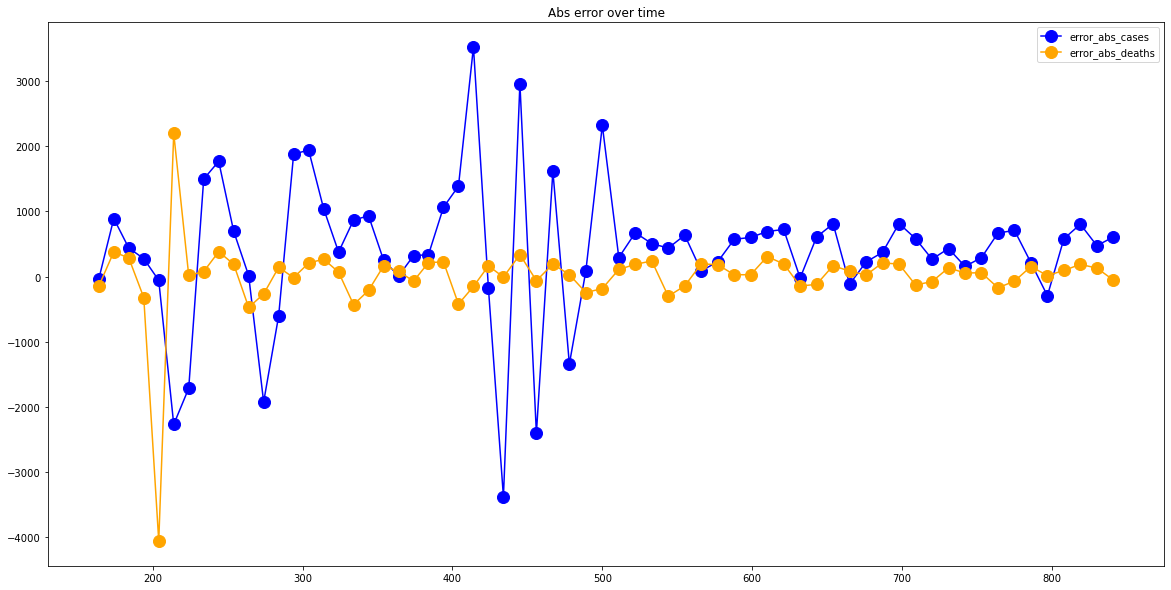

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAPE =  313.10769230769233
RMSE =  448.0983751880315
-- Germany performances for deaths --
MAPE =  33.23076923076923
RMSE =  53.78675845052744


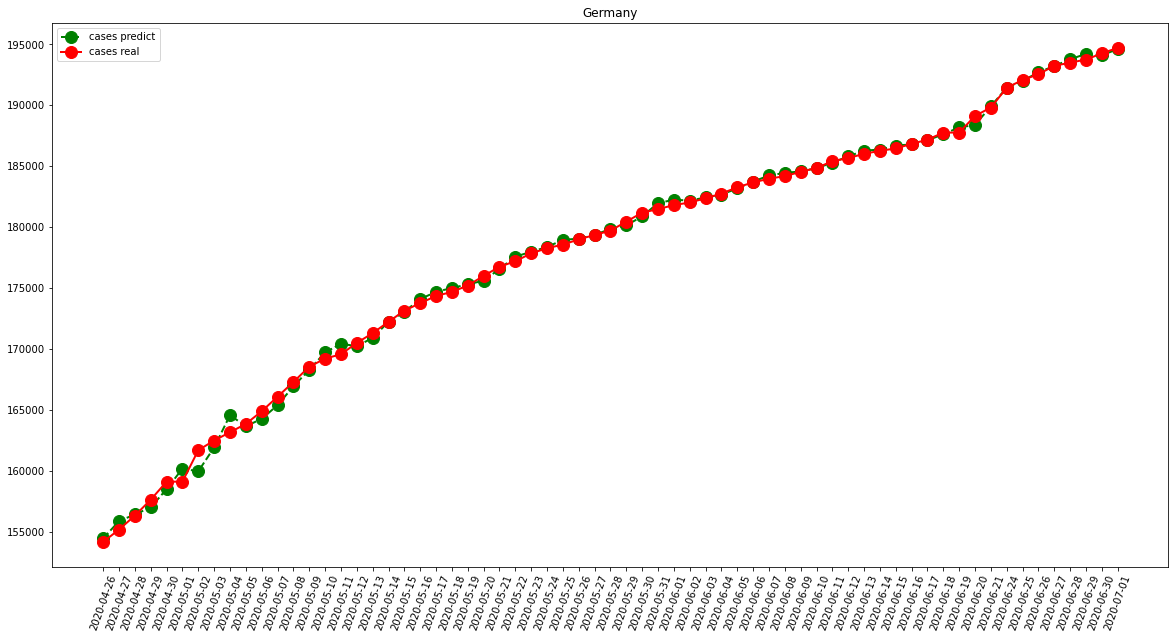

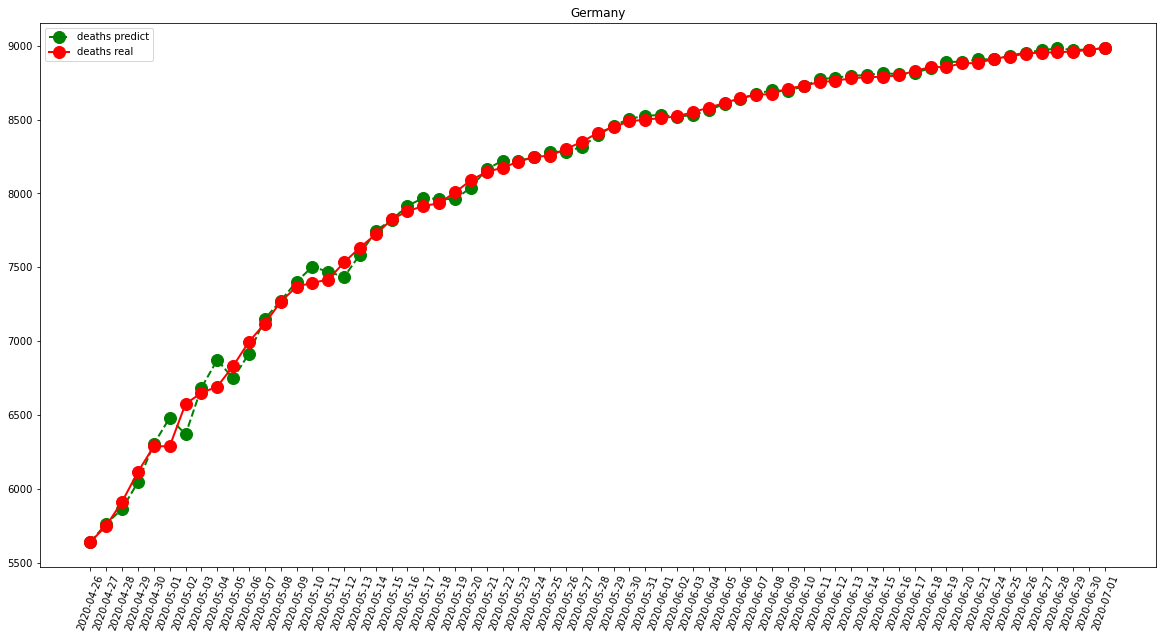

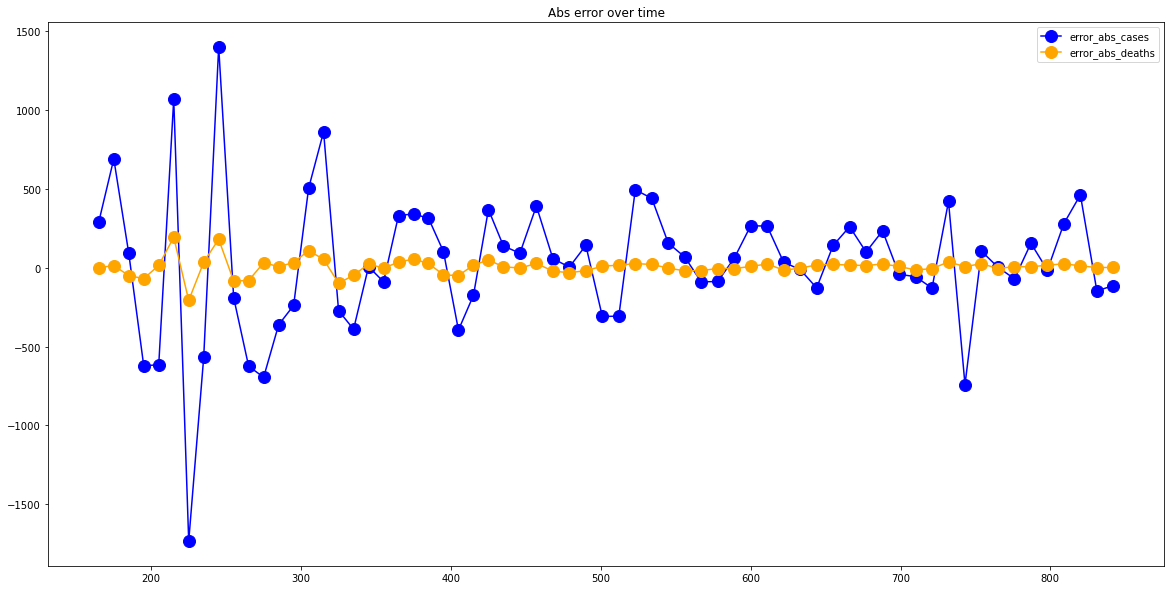

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAPE =  269.32307692307694
RMSE =  347.5384649436442
-- Iran performances for deaths --
MAPE =  18.076923076923077
RMSE =  29.994614901293918


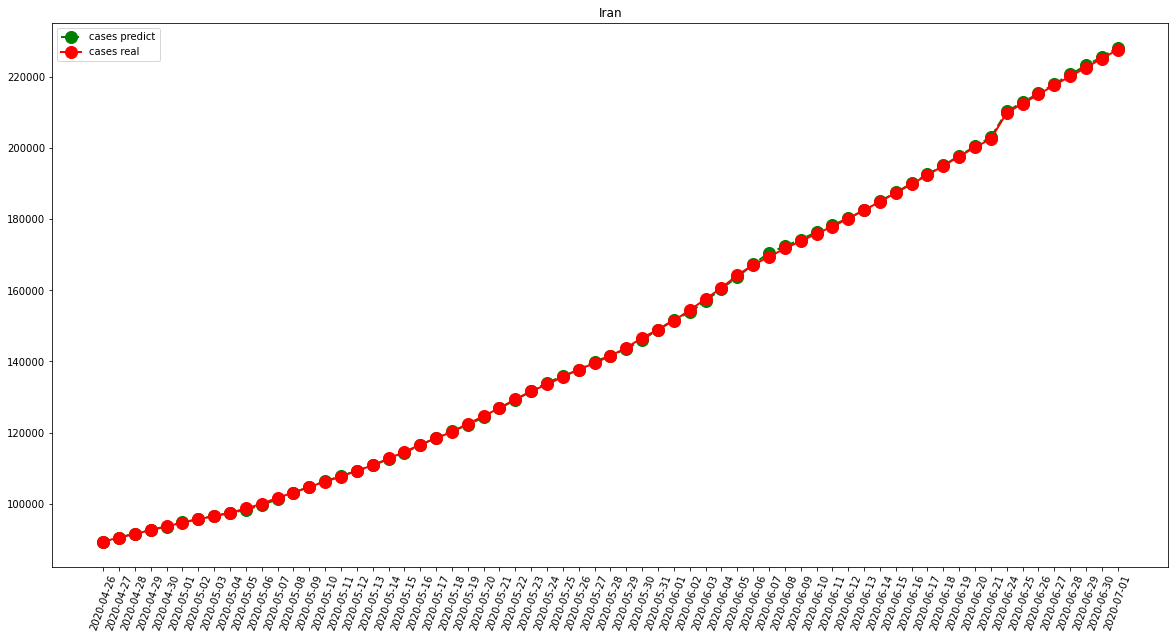

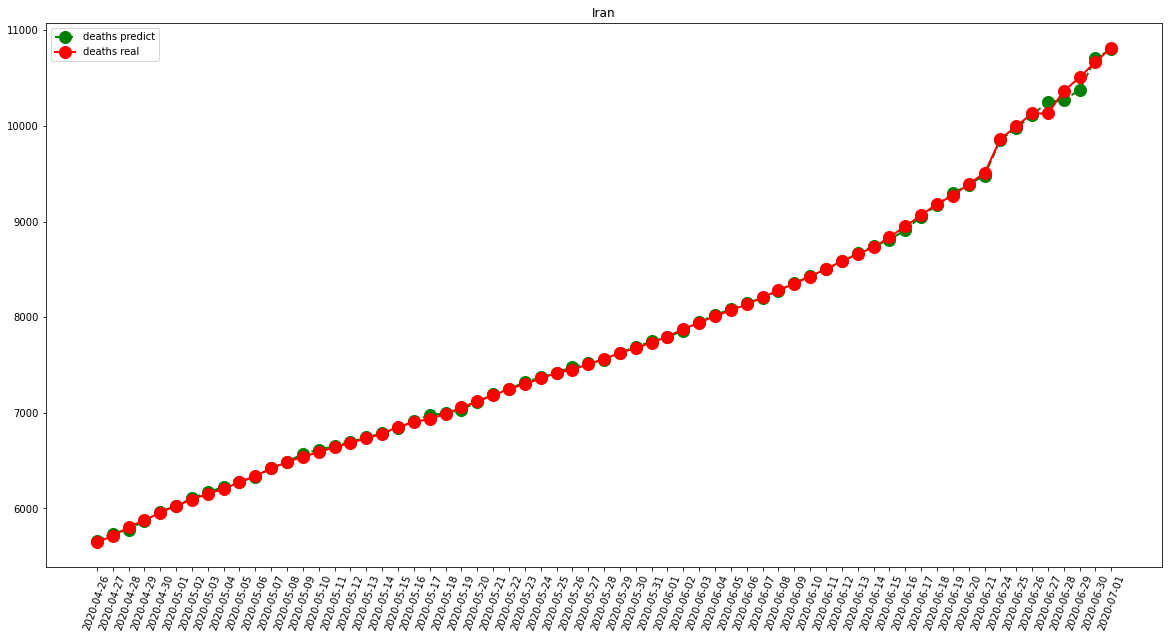

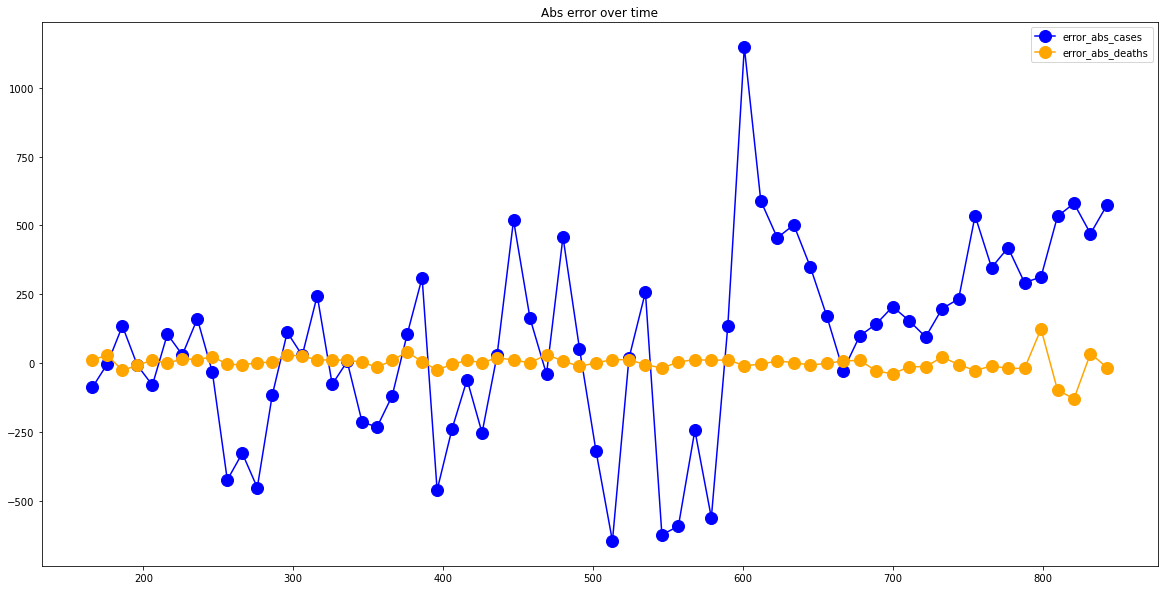

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAPE =  282.7692307692308
RMSE =  425.63097053306996
-- Turkey performances for deaths --
MAPE =  28.076923076923077
RMSE =  125.89537780969623


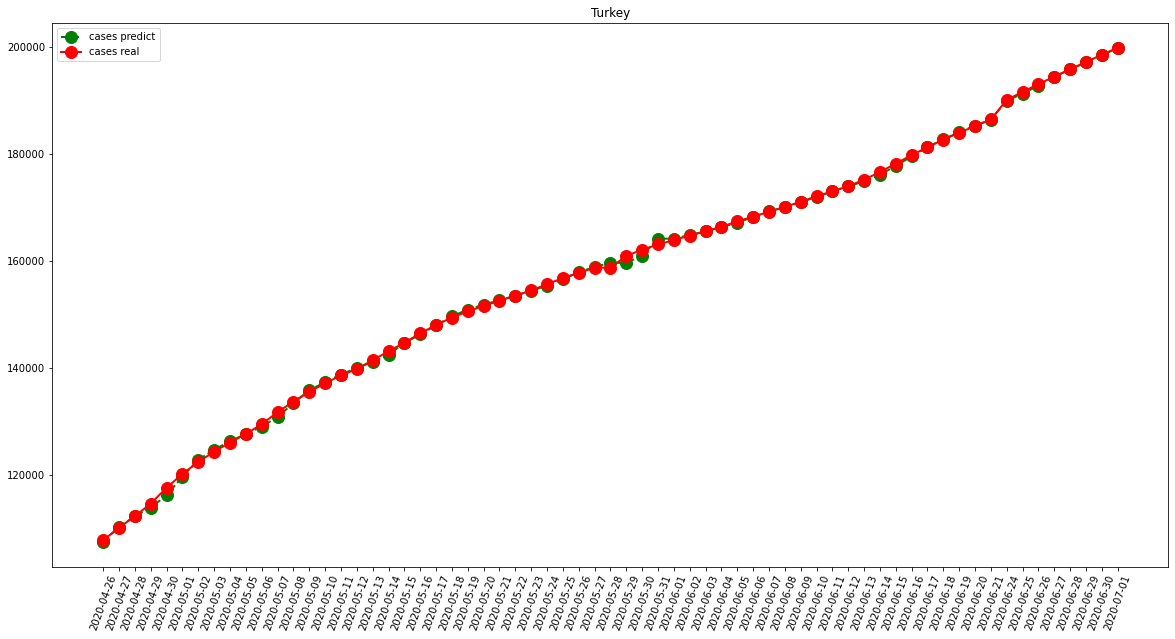

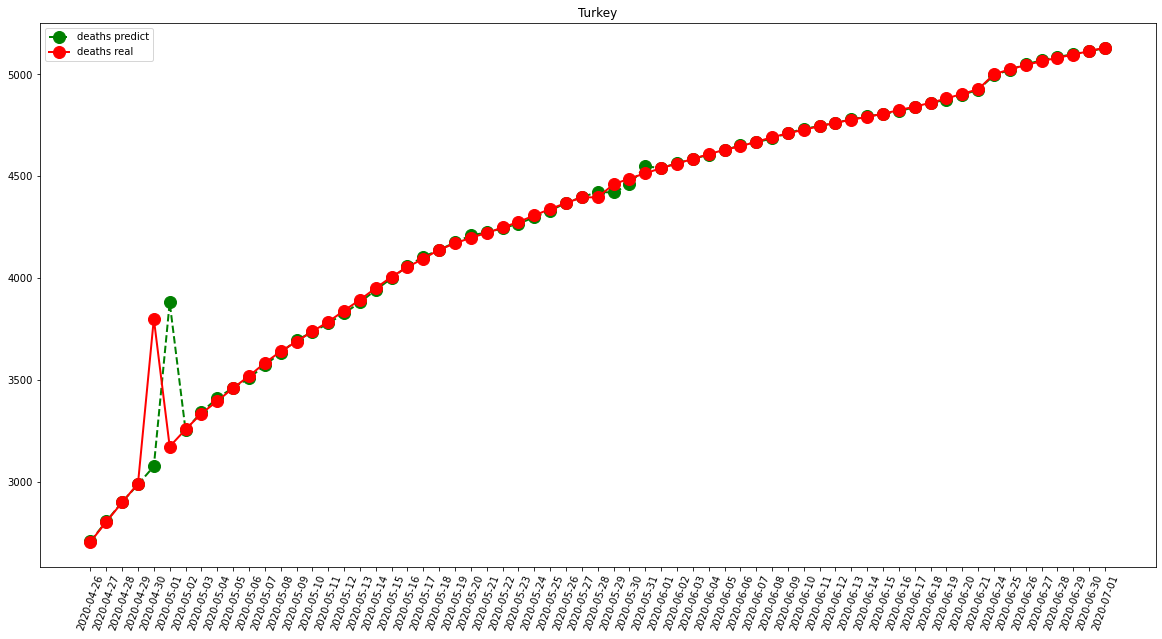

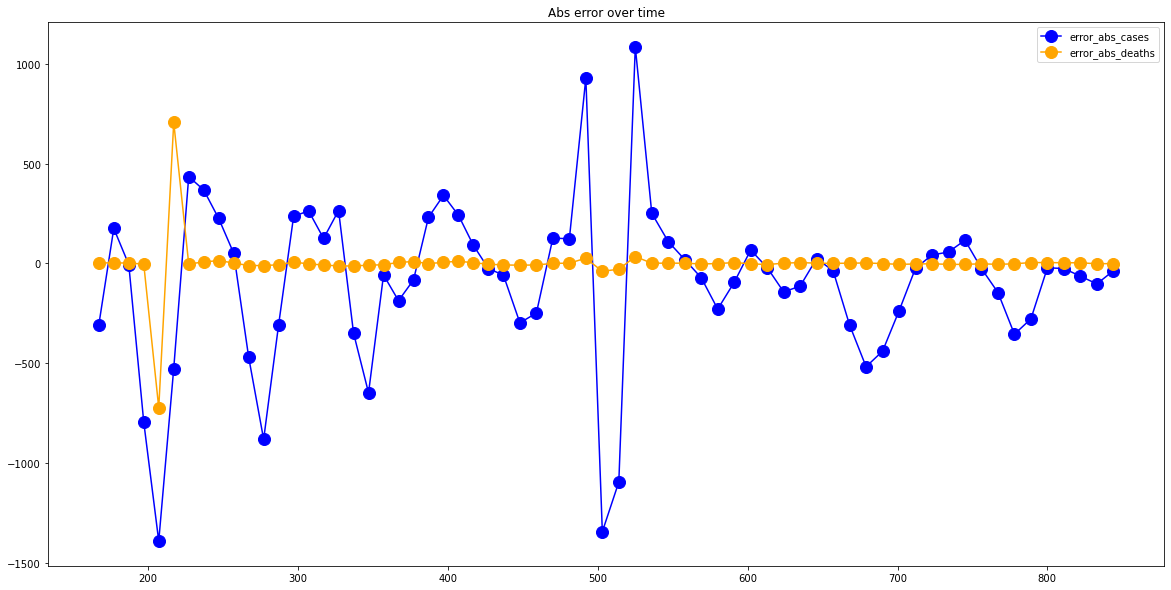

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAPE =  8717.5
RMSE =  11229.21444620893
-- Brazil performances for deaths --
MAPE =  389.92105263157896
RMSE =  475.5496819471127


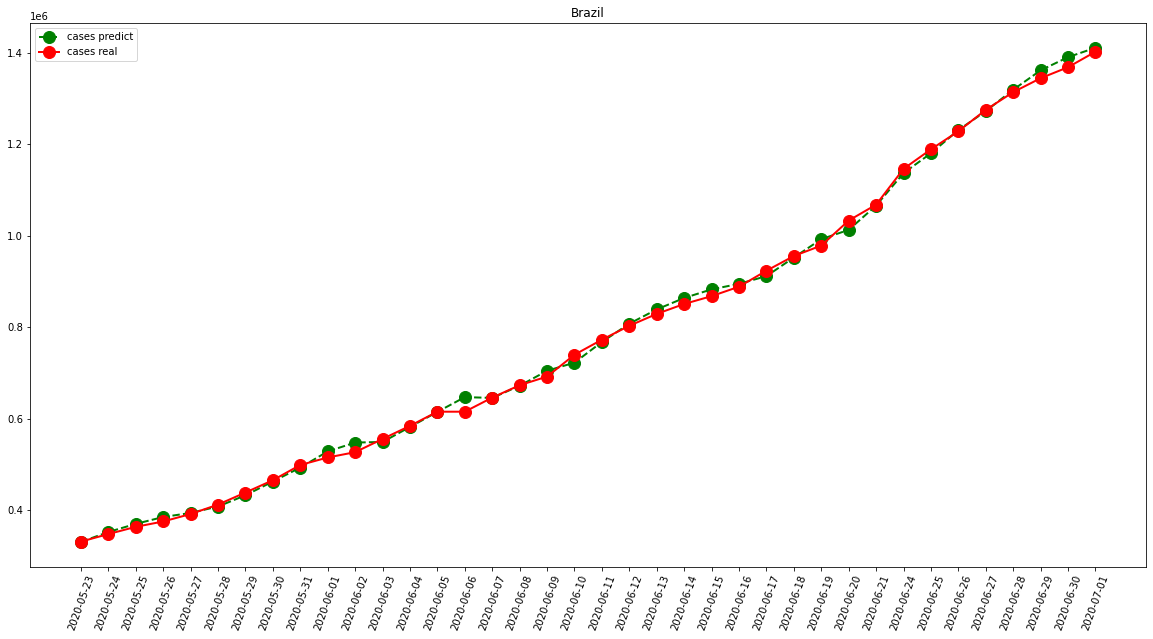

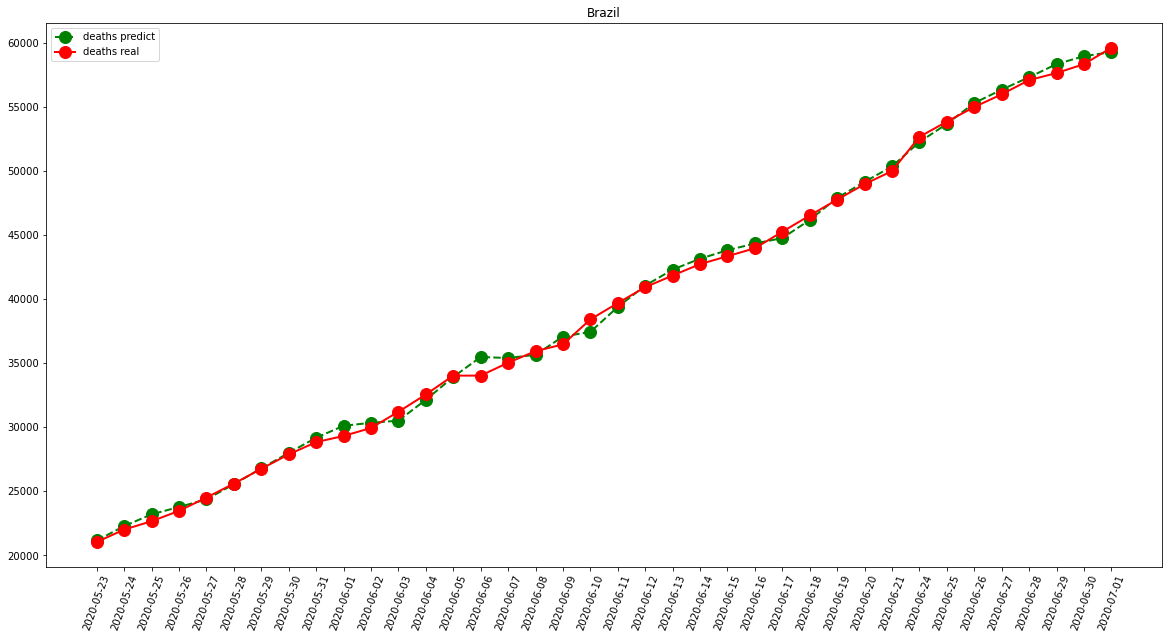

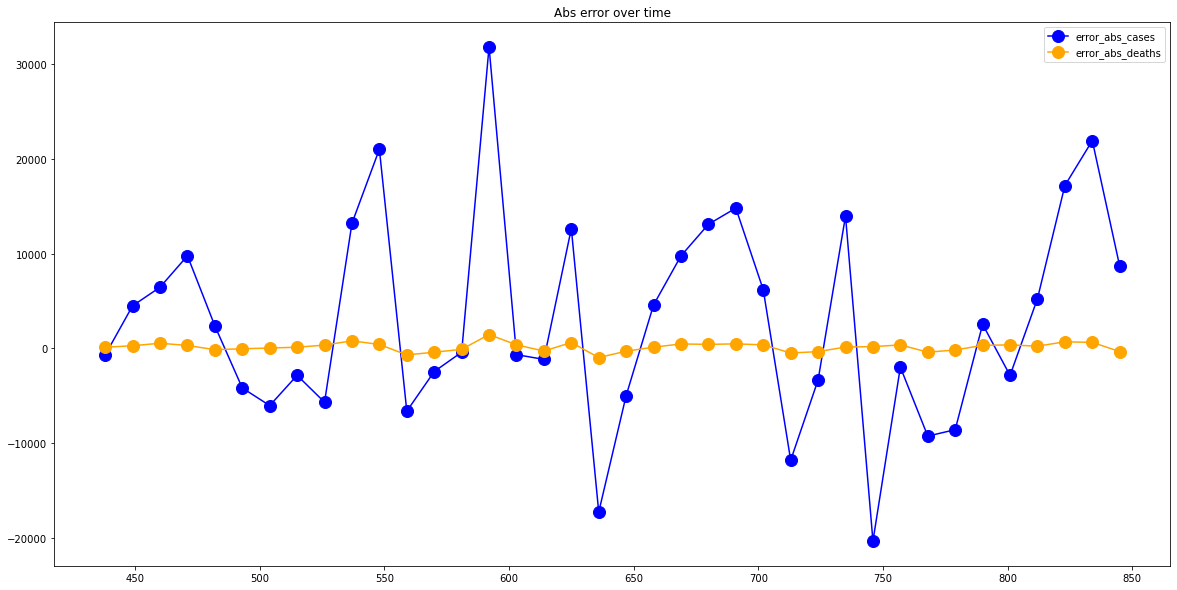

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)